### GRIP : THE SPARK FOUNDATION 
      Author : Gopal 
      Task 1
      

In [9]:
import pandas as pd

data=pd.read_csv('Data.csv')

In [20]:
import warnings
warnings.filterwarnings('ignore')


In [10]:
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [17]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [15]:
data.shape

(25, 2)

In [18]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Performing EDA

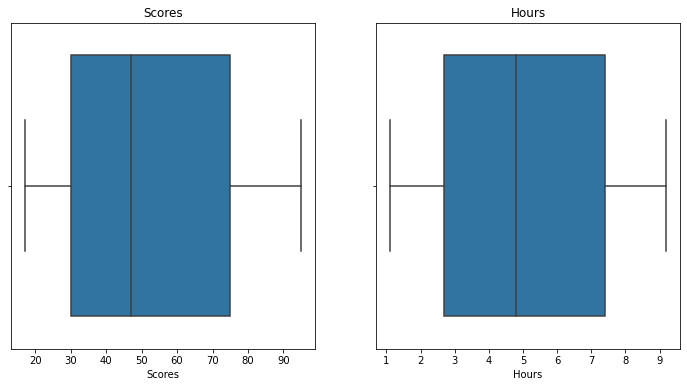

In [21]:
fig = plt.figure(figsize=(12,6))                # To check Outliers


ax1 = fig.add_subplot(1, 2, 1, title="Scores")
ax2 = fig.add_subplot(1, 2, 2, title="Hours")

sns.boxplot(data.Scores, ax=ax1)
sns.boxplot(data.Hours, ax=ax2)

plt.show()

ouliers are not present

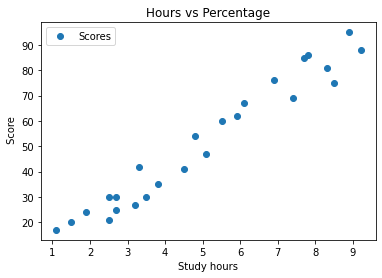

In [45]:
data.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')  
plt.xlabel('Study hours')  
plt.ylabel(' Score')  
plt.show()

We can say that there is positive correlation between percentge score and number of study hours


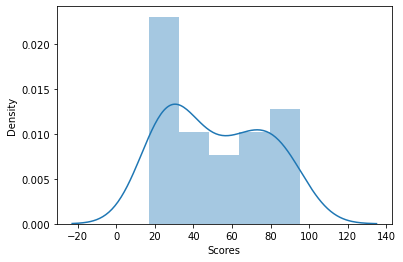

In [23]:
# To check for distribution of Scores in the dataset

sns.distplot(data['Scores'], bins=5)
plt.show()

Approx. normally distributed Hence, we can perform a LINEAR REGRESSION here

-----------------Performing Linear regression--------------------

In [25]:
x = data.iloc[:, :-1].values  
y = data.iloc[:, 1].values

In [26]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
#importig sklearn for testing

In [28]:
from sklearn.linear_model import LinearRegression  
lr = LinearRegression()  
lr.fit(x_train, y_train) 
#training of model

LinearRegression()

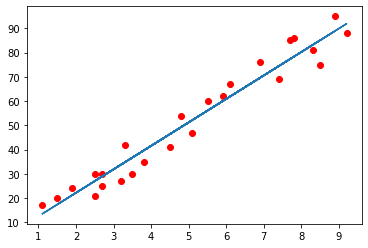

In [31]:
line = lr.coef_*x+lr.intercept_

# Plotting data points
plt.scatter(x, y, c= 'r')
plt.plot(x, line);
plt.show()

In [33]:
print("Training Score:",lr.score(x_train,y_train)*100)
print("Testing Score:",lr.score(x_test,y_test)*100)
#for accuracy measure on data

Training Score: 94.91209376364415
Testing Score: 96.78055545167994


In [34]:
print("y_test :")
print(y_test)
print()
print("x_test :")
print(x_test)

y_test :
[81 30 21 76 62]

x_test :
[[8.3]
 [2.5]
 [2.5]
 [6.9]
 [5.9]]


In [37]:
y_pred = lr.predict(x_test) # Predicting the scores
print("y_pred :")
print(y_pred)

y_pred :
[83.18814104 27.03208774 27.03208774 69.63323162 59.95115347]


In [38]:
# Comparing Predicted Value
dataframe = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
dataframe

,Actual,Predicted
0,81,83.188141
1,30,27.032088
2,21,27.032088
3,76,69.633232
4,62,59.951153


# What will be score if student study for 9.25 hours a day?

In [39]:
hours = 9.25
own_pred = lr.predict([[hours]])
print("No of study Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of study Hours = 9.25
Predicted Score = 92.38611528261494


# Evaluating the model

In [40]:
from sklearn import metrics

In [41]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))
#Mean Absolute error

Mean Absolute Error: 3.9207511902099244


In [42]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#Mean squared error

Mean Squared Error: 18.943211722315272


# Conclusion

Using Simple Regression we concluded that predicted score after studying 9.25 hours will be 92.38 

# --------------------------------------------------------------------------------------------------